# ISSS610-Applied Machine Learning
## Business Problem
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

# Data Set
This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.
https://www.kaggle.com/mojtaba142/hotel-booking

https://www.sciencedirect.com/science/article/pii/S2352340918315191

Done By 
- Anna Choo Xin Yi
- Filbert
- Wesley Djingga
- Xie Jianlong
- Zhang Jieyuan


# Import Libraries

In [1]:
#Import all here
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
import seaborn as sns
import numpy as np
import pandas as pd
import dill as pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## Data Retrival

In [2]:
x_under_train,x_under_test,y_under_train,y_under_test,x_train,x_test,y_train,y_test = pickle.load(open("2.out.x_y_train_test", 'rb'))

## K-Nearest Neighbour

### Feature Engineering

### Train my hot encoder

In [3]:
#Take from Forest
enc = pickle.load(open("3a.out.enc", 'rb'))

### Create my knn Transform function

In [4]:
forest_transform = pickle.load(open("3a.out.forest_transform", 'rb'))

def knn_transform(input_x):
    scaler = pickle.load(open("3b.out.scaler", 'rb'))
    return scaler.transform(forest_transform(input_x))
pickle.dump(knn_transform,open("3b.out.knn_transform",'wb'))

### Train my scaler

In [5]:
scaler = StandardScaler()
scaler.fit(forest_transform(x_train))
pickle.dump(scaler,open("3b.out.scaler",'wb'))

## Test Default Result

### Without Down Sampling

In [6]:
#1m 4.3s
# Instantiate and fit the knnClassifier
knn = KNeighborsClassifier()
knn.fit(knn_transform(x_train), y_train)

# Make predictions for the test set
y_pred_test_knn = knn.predict(knn_transform(x_test))

# # View accuracy score
print(accuracy_score(y_test, y_pred_test_knn))

# # View confusion matrix for test_knn data and predictions
print(confusion_matrix(y_test, y_pred_test_knn))

# View the classification report for test_knn data and predictions
print(classification_report(y_test, y_pred_test_knn))

0.7970575508437906
[[12176  2235]
 [ 2455  6244]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     14411
           1       0.74      0.72      0.73      8699

    accuracy                           0.80     23110
   macro avg       0.78      0.78      0.78     23110
weighted avg       0.80      0.80      0.80     23110



### With Down Sampling

In [7]:
#31.4s
# Instantiate and fit the knnClassifier
knn = KNeighborsClassifier()
knn.fit(knn_transform(x_under_train), y_under_train)

# Make predictions for the test set
y_under_pred_test_knn = knn.predict(knn_transform(x_under_test))

# # View accuracy score
print(accuracy_score(y_under_test, y_under_pred_test_knn))

# # View confusion matrix for test_knn data and predictions
print(confusion_matrix(y_under_test, y_under_pred_test_knn))

# View the classification report for test_knn data and predictions
print(classification_report(y_under_test, y_under_pred_test_knn))

0.7667818077144501
[[6282 2388]
 [1663 7037]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      8670
           1       0.75      0.81      0.78      8700

    accuracy                           0.77     17370
   macro avg       0.77      0.77      0.77     17370
weighted avg       0.77      0.77      0.77     17370



## Hyper Parameter Tuning - Using no downsampling

### Try different Neighbour

In [11]:
#2m 43.3s
# https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/
n_neigh= [300]
acc = [0 for i in range(len(n_neigh))]


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for i in range(len(n_neigh)):
#Import K NeighborsClassifer
    knn = KNeighborsClassifier(n_neighbors = n_neigh[i],weights = 'distance')
    knn.fit(knn_transform(x_train), y_train)
    predict_KN = knn.predict(knn_transform(x_test))
    
    acc[i]=metrics.accuracy_score(y_test, predict_KN)
    
    report = """ 
    For n_neigh of {}
    Confusion_matrix:{}
    Accuracy: {}
    Classification Report:{}""".format(
    n_neigh[i],
    metrics.confusion_matrix(y_test, predict_KN),
    metrics.accuracy_score(y_test, predict_KN),
    metrics.classification_report(y_test, predict_KN))
    print(report)

 
    For n_neigh of 300
    Confusion_matrix:[[13715   696]
 [ 3394  5305]]
    Accuracy: 0.8230203375162267
    Classification Report:              precision    recall  f1-score   support

           0       0.80      0.95      0.87     14411
           1       0.88      0.61      0.72      8699

    accuracy                           0.82     23110
   macro avg       0.84      0.78      0.80     23110
weighted avg       0.83      0.82      0.81     23110



[Text(0.5, 0, 'N Neighbour'), Text(0, 0.5, 'F1 Score')]

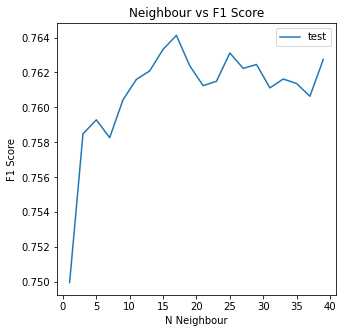

In [15]:
#15m 16.9s  - 2hour
# f1sTrain = []
# f1sTest = []
# maxNeighbor = [x for x in range(1,40,2)]
# for n_neighb in maxNeighbor:
#     knn = KNeighborsClassifier(n_neighbors = n_neighb,weights = 'distance')
#     knn.fit(knn_transform(x_train), y_train)
#     y_pred = knn.predict(knn_transform(x_train))
#     f1sTrain.append(round(f1_score(y_train, y_pred),6))
#     y_pred = knn.predict(knn_transform(x_test))
#     f1sTest.append(round(f1_score(y_test, y_pred),6))
plt.figure(figsize=(5,5))
p = sns.lineplot(data=pd.DataFrame(data={'test': pd.Series(f1sTest, index=maxNeighbor)}))   
p.set_title("Neighbour vs F1 Score")
p.set( xlabel = "N Neighbour", ylabel = "F1 Score")

#Best Neighbor 17

## Final Result -Without Downsampling with Hyperparameter Tuned

In [20]:
#1m 11s
#Import K NeighborsClassifer
knn = KNeighborsClassifier(n_neighbors = 17,weights = 'distance')
knn.fit(knn_transform(x_train), y_train)
predict_KN = knn.predict(knn_transform(x_test))

report = """ 
Confusion_matrix:
{}
Accuracy: {}
Classification Report:
{}""".format(
metrics.confusion_matrix(y_test, predict_KN),
metrics.accuracy_score(y_test, predict_KN),
metrics.classification_report(y_test, predict_KN))
print(report)

 
Confusion_matrix:
[[12762  1649]
 [ 2301  6398]]
Accuracy: 0.8290783210731285
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     14411
           1       0.80      0.74      0.76      8699

    accuracy                           0.83     23110
   macro avg       0.82      0.81      0.82     23110
weighted avg       0.83      0.83      0.83     23110



## Performance Measure

In [18]:
#2m30s
# prepare the cross-validation procedure
cv = KFold(n_splits=2, random_state=2021, shuffle=True)
# create model
model = KNeighborsClassifier(n_neighbors = 17,weights = 'distance')
# evaluate model
scores = cross_val_score(model, knn_transform(x_train), y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.768 (0.001)


### ROC

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.901


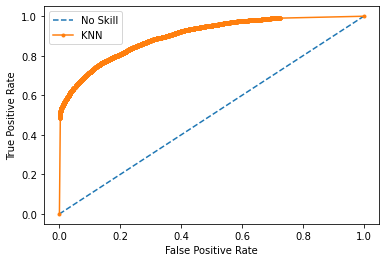

In [21]:
#1m
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
# predict probabilities
lr_probs = knn.predict_proba(knn_transform(x_test))
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Export

In [22]:
pickle.dump(knn, open('3b.out.knn', 'wb'))